In [48]:
import networkx as nx
import numpy as np 

graph_size = 5
testG = nx.Graph()
testG.add_nodes_from(
    [ ("n{}".format(i), {'weight':np.random.randint(1, 5)}) for i in range(0, graph_size) ]
)
testG.add_edges_from(
    [ ("n{}".format(i), "n{}".format(j), {'weight':np.random.randint(1.0, 10.0)}) 
     for i in range(0, graph_size) for j in range(0, graph_size)]
)
testG.nodes(data=True)
print(testG.edges(data=True))
"""
자 이제 필요없는 edge나 node를 어떻게 filtering할 수 있을까요?
처음에는 edge 를 list로 바꾼 다음, edge들을 다시 새로운 graph에 추가하면 되는 것이 아닌가? 라고 생각했는데, 
그 경우에는 node data dictionary가 없어진다. 
따라서 나중에 그림을 그릴 때, node의 빈도에 따라 크기를 다르게 하려면 data dictionary도 함께 넣어주는 것이 필요하다. 
결국 매번 add_nodes, add_weighted_edges_from 을 모두 쓰는 것이 필요함.
"""

"""
가능하면 add_weighted_edgeds_from 보다 add_edges_from 을 사용하고, 이때 information dictionary를 함께 넘기는 식으로 하자. 
(from, to, weight) 보다는 (from, to, {'weight':weight}) 가 훨씬 직관적이고, 전체 nx에서 많이 사용되는 데이터 구조의 형태. 
"""
"""
또한 반드시 list로 넘겨야 하는 것도 아니다. filter map 등의 iterator의 형태로 넘겨도 알아서 잘됨. 
"""
newG = nx.Graph()
newG.add_nodes_from(
    testG.nodes(data=True)
)
newG.add_edges_from(
    filter(lambda x: True if x[0]!=x[1] else False, testG.edges(data=True))
)
newG.edges(data=True)
"""
extract ego graph 
"""
nx.ego_graph(newG, 'n1').edges(data=True)



[('n0', 'n0', {'weight': 5}), ('n0', 'n1', {'weight': 4}), ('n0', 'n2', {'weight': 6}), ('n0', 'n3', {'weight': 5}), ('n0', 'n4', {'weight': 4}), ('n1', 'n1', {'weight': 3}), ('n1', 'n2', {'weight': 5}), ('n1', 'n3', {'weight': 5}), ('n1', 'n4', {'weight': 3}), ('n2', 'n2', {'weight': 2}), ('n2', 'n3', {'weight': 9}), ('n2', 'n4', {'weight': 8}), ('n3', 'n3', {'weight': 6}), ('n3', 'n4', {'weight': 7}), ('n4', 'n4', {'weight': 1})]


EdgeDataView([('n0', 'n1', {'weight': 4}), ('n0', 'n2', {'weight': 6}), ('n0', 'n3', {'weight': 5}), ('n0', 'n4', {'weight': 4}), ('n1', 'n2', {'weight': 5}), ('n1', 'n3', {'weight': 5}), ('n1', 'n4', {'weight': 3}), ('n2', 'n3', {'weight': 9}), ('n2', 'n4', {'weight': 8}), ('n3', 'n4', {'weight': 7})])

In [53]:
import networkx as nx
import numpy as np 

graph_size = 5
testG = nx.Graph()
testG.add_nodes_from(
    [ ("n{}".format(i), {'weight':np.random.randint(1, 5)}) for i in range(0, graph_size) ]
)
testG.add_weighted_edges_from(
    [ ("n{}".format(i), "n{}".format(j), np.random.randint(1.0, 10.0)) # (from_node, to_node, weight) 
     for i in range(0, graph_size) for j in range(0, graph_size)]
)

for e in testG.edges(data=True):
    print(e)

('n0', 'n0', {'weight': 3})
('n0', 'n1', {'weight': 2})
('n0', 'n2', {'weight': 9})
('n0', 'n3', {'weight': 5})
('n0', 'n4', {'weight': 9})
('n1', 'n1', {'weight': 9})
('n1', 'n2', {'weight': 3})
('n1', 'n3', {'weight': 2})
('n1', 'n4', {'weight': 6})
('n2', 'n2', {'weight': 4})
('n2', 'n3', {'weight': 2})
('n2', 'n4', {'weight': 1})
('n3', 'n3', {'weight': 1})
('n3', 'n4', {'weight': 3})
('n4', 'n4', {'weight': 7})


In [54]:
graph_size = 5
testG = nx.Graph()

testG.add_nodes_from(
    [ ("n{}".format(i), {'weight':np.random.randint(1, 5)}) for i in range(0, graph_size) ]
)
testG.add_edges_from(
    [ ("n{}".format(i), "n{}".format(j), {'weight': np.random.randint(1.0, 10.0)}) # (from_node, to_node, weight) 
     for i in range(0, graph_size) for j in range(0, graph_size)
    ]
)

for e in testG.edges(data=True):
    print(e)

('n0', 'n0', {'weight': 3})
('n0', 'n1', {'weight': 2})
('n0', 'n2', {'weight': 3})
('n0', 'n3', {'weight': 3})
('n0', 'n4', {'weight': 3})
('n1', 'n1', {'weight': 1})
('n1', 'n2', {'weight': 4})
('n1', 'n3', {'weight': 7})
('n1', 'n4', {'weight': 8})
('n2', 'n2', {'weight': 8})
('n2', 'n3', {'weight': 4})
('n2', 'n4', {'weight': 6})
('n3', 'n3', {'weight': 5})
('n3', 'n4', {'weight': 4})
('n4', 'n4', {'weight': 5})


In [220]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt

graph_size = 10
testG = nx.Graph()
testG.add_nodes_from(
    [ ("n{}".format(i), {'weight':np.random.randint(1, 5)}) for i in range(0, graph_size) ]
)
testG.add_edges_from(
    [ ("n{}".format(i), "n{}".format(j), {'weight':np.random.randint(1.0, 10.0)}) 
     for i in range(0, graph_size) for j in range(0, graph_size)]
)
testG.nodes(data=True)



def drop_low_weighted_edge(inputG, above_weight=3):
    rG = nx.Graph()
    rG.add_nodes_from(inputG.nodes(data=True))
    edges = filter(lambda e: True if e[2]['weight']>=above_weight else False, inputG.edges(data=True))
    rG.add_edges_from(edges)
    return rG

plt.figure(figsize=(10,5))
pos = nx.spring_layout(testG)
nx.draw_networkx(testG, pos)
plt.axis('off')
plt.savefig('../../assets/images/markdown_img/nx_graph_control_201805091345.svg')

plt.figure(figsize=(10,5))
nx.draw_networkx(drop_low_weighted_edge(testG, 7), pos)
plt.axis('off')
plt.savefig('../../assets/images/markdown_img/nx_graph_control_201805091346.svg')

In [91]:
plt.close('all')

G1 = drop_low_weighted_edge(testG, 8)
plt.figure(figsize=(10,5))
pos = nx.spring_layout(G1)
nx.draw_networkx(G1, pos)
plt.axis('off')
plt.savefig('../../assets/images/markdown_img/nx_graph_control_201805091359.svg')

G1_ego_n5 = nx.ego_graph(G1, 'n5')
plt.figure(figsize=(10,5))
nx.draw_networkx(G1_ego_n5, pos)
plt.axis('off')
plt.savefig('../../assets/images/markdown_img/nx_graph_control_201805091400.svg')

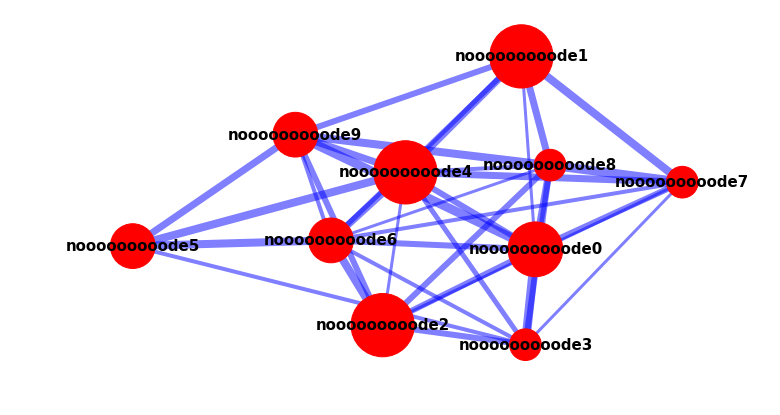

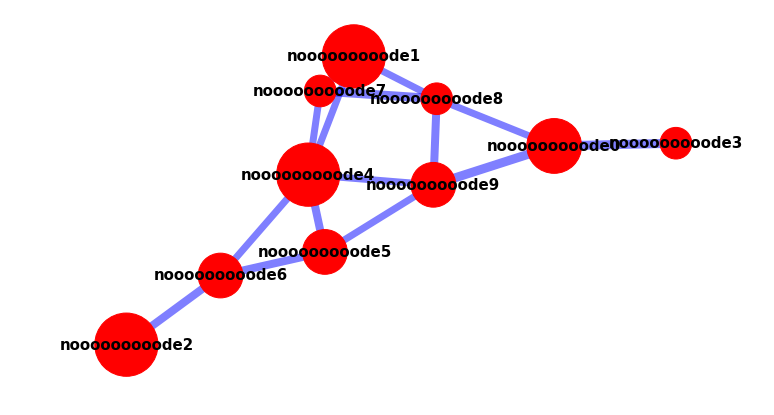

In [275]:
"""
시끄럽고, 일단 그려 봅시다
"""
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt

# 그래프 생성
graph_size = 10
testG = nx.Graph()
testG.add_nodes_from(
    [ ("nooooooooode{}".format(i), {'weight':np.random.randint(1, 5)}) for i in range(0, graph_size) ]
)
testG.add_edges_from(
    [ ("nooooooooode{}".format(i), "nooooooooode{}".format(j), {'weight':np.random.randint(1.0, 10.0)}) 
     for i in range(0, graph_size-1) for j in range(i+1, graph_size)]
)


"""
- 바로 그릴 수 있는 function이 있기는 한데, 그다지 마음에 들지 않음. 
- 보통 keyword들은 이름이 길기 때문에 여기서도 이름을 일단 길게 만들어봄. 
"""
plt.close('all')

# 이렇게 간단하게 그릴 수도 있는데, 그다지 마음에 들지 않음. 


"""
- font_size 의 경우는 수정하려면 전체를 고쳐야 함
    - 그런데, 이는 개별 노드별로 따로 font_size를 반영할 수 없음. 
- alpha의 경우도 node와 edge가 모두 함께 반영됨. 
- 
"""
def drop_low_weighted_edge(inputG, above_weight=3):
    rG = nx.Graph()
    rG.add_nodes_from(inputG.nodes(data=True))
    edges = filter(lambda e: True if e[2]['weight']>=above_weight else False, inputG.edges(data=True))
    rG.add_edges_from(edges)
    """
    neighbor가 없는 isolated node를 모두 지운다. 
    """
    for n in inputG.nodes():
        if len(list(nx.all_neighbors(rG, n)))==0:
            rG.remove_node(n)
        #print(n, list(nx.all_neighbors(rG, n)))
    return rG

def draw_whole_graph(inputG, outputFileName):
    f = plt.figure(figsize=(13,7))
    plt.margins(x=0.1, y=0.1) # text 가 잘리는 경우가 있어서, margins을 넣음
    pos = nx.spring_layout(inputG)
    """
    - weight에 따라서 값을 0.1에서 1.0으로 스케일링 하는데, 그냥 minmax scaling 하는 것은 적합하지 않을 것 같고 
    - 해당 데이터들이 특정한 분포를 가지고 있다고 가정하고, 그 분포에 의거해서 그림을 그려주는 게 좋을 것 같다는 생각이 드는데. 
    - 흐음. 
    """
    node_weight_lst = map(np.log, [n[1]['weight'] for n in inputG.nodes(data=True)])
    edge_weight_lst = [e[2]['weight'] for e in inputG.edges(data=True)] 
    nx.draw_networkx_nodes(inputG, pos, 
                     node_size = [ n[1]['weight']*1000 for n in inputG.nodes(data=True)],
                     alpha=1.0 )
    """
    - label의 경우는 특정 node만 그릴 수 없음. 그리면 모두 그려야함. 
    """
    nx.draw_networkx_labels(inputG, pos, font_weight='bold', 
                            font_family='sans-serif', 
                            font_color='black', font_size=15
                           )
    nx.draw_networkx_edges(inputG, pos, 
                           width = [e[2]['weight'] for e in inputG.edges(data=True)], 
                           edge_color='b', alpha=0.5
                          )
    plt.axis('off')
    plt.show()
    """
    plt.savefig('../../assets/images/markdown_img/'+outputFileName)
    return f
    """
    
    
draw_whole_graph(drop_low_weighted_edge(testG, 3), 'nx_graph_control_201805091625.svg')
draw_whole_graph(drop_low_weighted_edge(testG, 7), 'nx_graph_control_201805091626.svg')

In [280]:
import pandas as pd
import itertools 

excel_path_and_filename = "../../../Downloads/SMEs_Scopus_2013-2017.xlsx"
df = pd.read_excel(excel_path_and_filename)
df = df[['Author Keywords', 'Year', 'Abstract']]


In [281]:

"""
df로부터 그래프를 만ㄷ르어서 리턴해주는 함수입니다.
"""
def make_graph(input_df, column_name='Author Keywords'):
    # make edges: edge가 중복으로 생기지 않게 하려면, 
    def make_edges_from_lst(lst):
        if len(lst)>1:
            return [(lst[i], lst[j]) for i in range(0, len(lst)-1) for j in range(i+1, len(lst))]
        else:
            return []
    edges = itertools.chain.from_iterable(input_df[column_name].apply(make_edges_from_lst))
    edges = ((uv[0], uv[1], w) for uv, w in Counter(edges).most_common())
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    # graph에 대한 데이터 필터링이 필요할 수 있는데. 여기서. 
    return G
make_graph(df[:500].copy())

TypeError: object of type 'float' has no len()